# Lets make up some data and analyse them 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['xtick.labelsize'] = 20.
plt.rcParams['ytick.labelsize'] = 20.
plt.rcParams['axes.labelsize'] = 25.
plt.rcParams['legend.fontsize'] = 25.
plt.rcParams['axes.titlesize'] = 25.



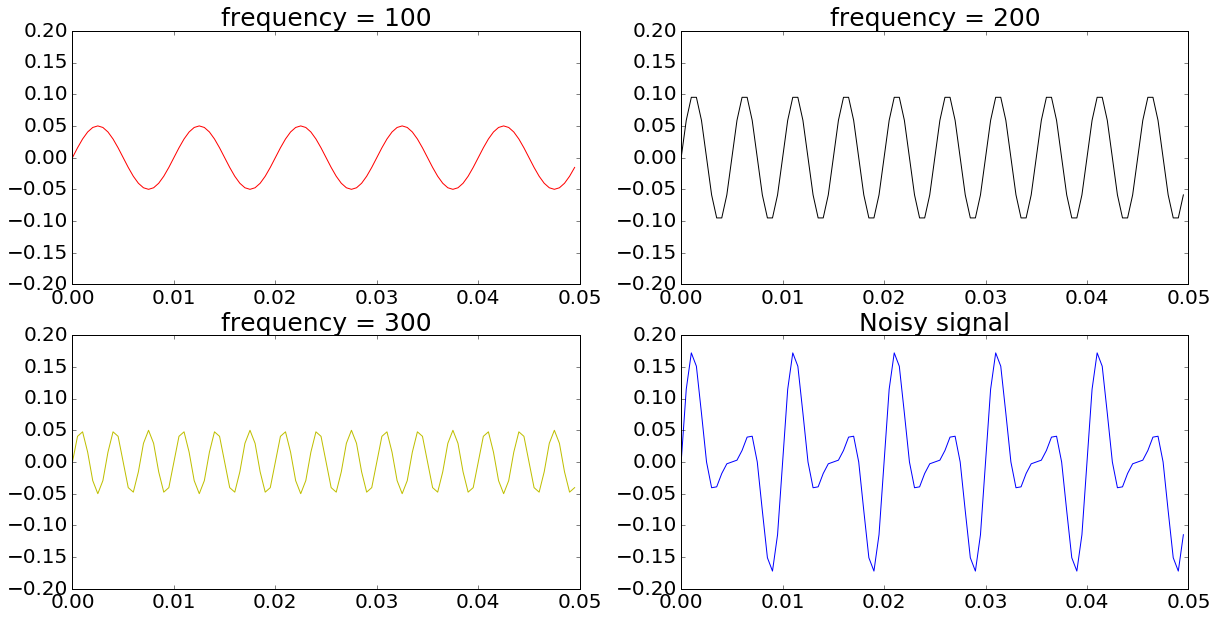

In [51]:
T = 0.05
fs = 2000
nsamples = T * fs
t = np.linspace(0, T, int(nsamples),endpoint=False)
#Amplitudes
a1 = 0.05
a2 = 0.1
a3 = 0.05
#Frequencies
f1 = 100
f2 = 200
f3 = 300
#signal : Adding the three signals
x = a1*np.sin(2.*np.pi*f1*t)
x += a2*np.sin(2.*np.pi*f2*t)
x += a3*np.sin(2.*np.pi*f3*t)

#### plotting signal ####
# First signal
fig = plt.figure(1)
ax = fig.add_subplot(2,2,1)
ax.set_title("frequency = %d"%f1)
ax.set_ylim(-0.2,0.2)
ax.plot(t,a1*np.sin(2.*np.pi*f1*t),'r')
####################################
# Second Signal
ax = fig.add_subplot(2,2,2)
ax.set_ylim(-0.2,0.2)
ax.set_title("frequency = %d"%f2)
plt.plot(t,a2*np.sin(2.*np.pi*f2*t),'k')
####################################
#Third Signal
ax = fig.add_subplot(2,2,3)
ax.set_ylim(-0.2,0.2)
ax.set_title("frequency = %d"%f3)
plt.plot(t,a3*np.sin(2.*np.pi*f3*t),'y')
####################################
# Summation of all three Signals
ax = fig.add_subplot(2,2,4)
ax.set_ylim(-0.2,0.2)
ax.set_title("Noisy signal")
plt.plot(t, x)
plt.show()

# Plotting Power Spectrum

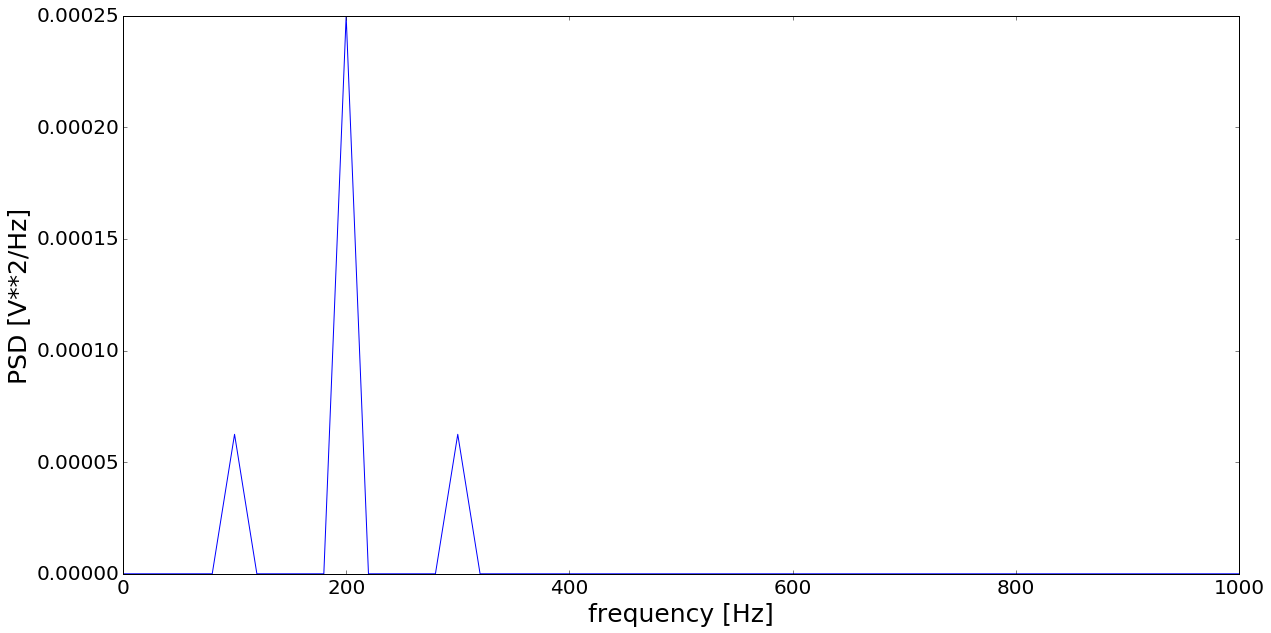

In [52]:
f, Pxx_den = signal.periodogram(x, fs)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

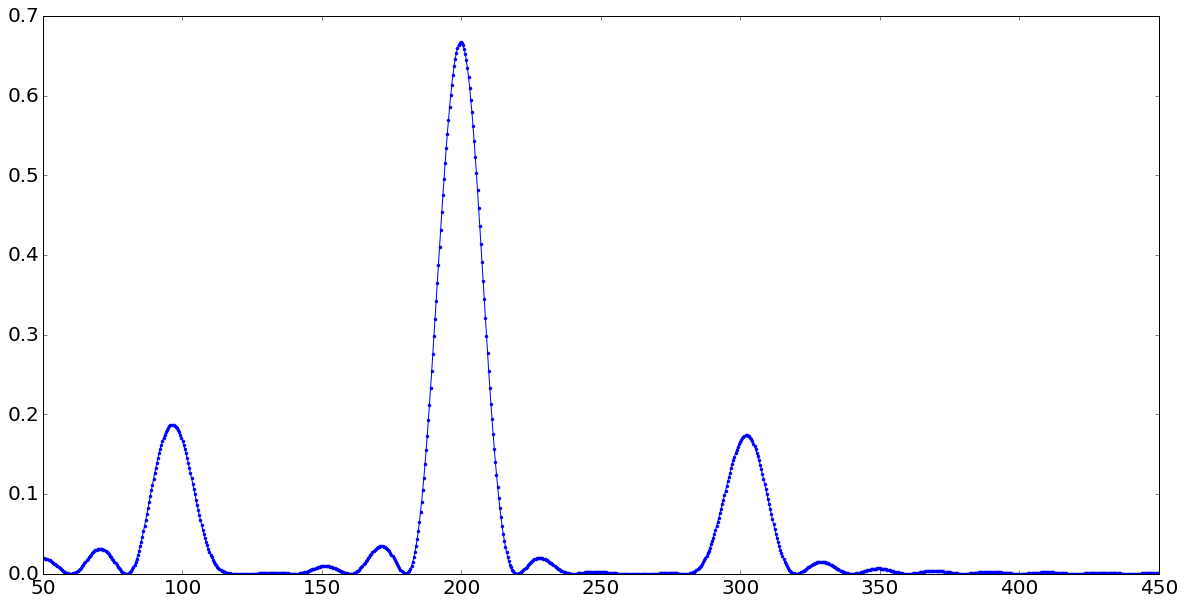

In [53]:
## period => [0.05 , 50] microsecs
frequencies = np.linspace(50,450,1000)*(2.*np.pi)
pgram = signal.lombscargle(t,x, frequencies,normalize=True)
# Plotting the Frequency Power Spectrum
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(frequencies/(2.*np.pi),pgram, 'b.-')
#ax1.axvline(0.03,c='k',lw=2.)
plt.show()
#plt.xlim(0,2500)

# Filtering the lower and higher frequency

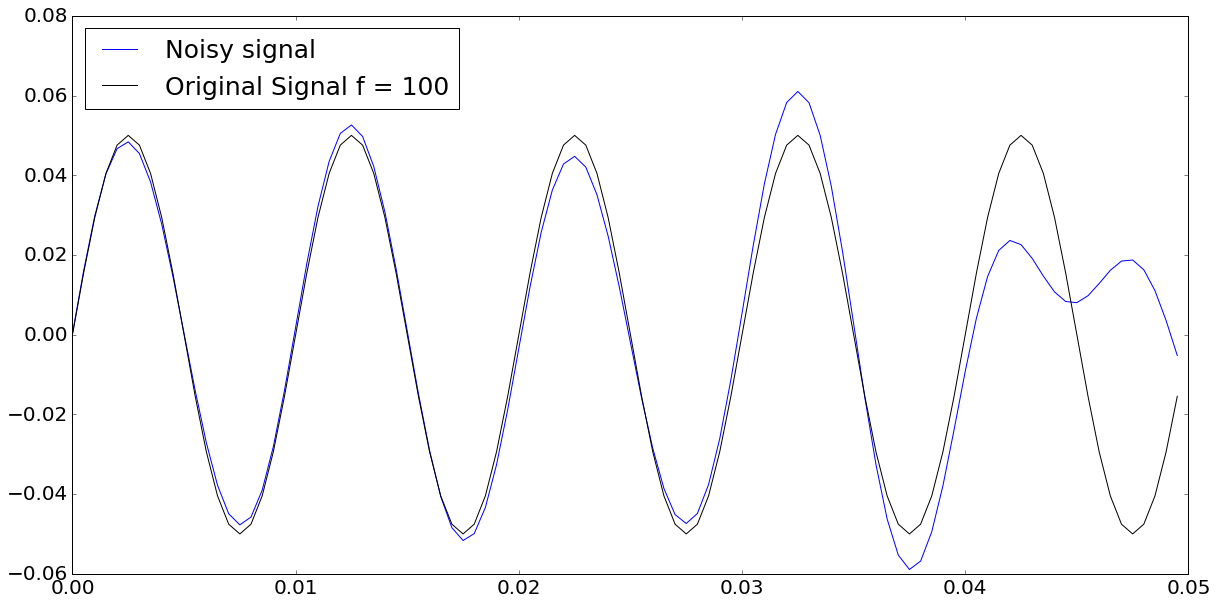

In [50]:
# First, design the Buterworth filter
N  = 5  # Filter order
Nf = fs*0.5 #Nyquist frequency
lowF = 50# Low Cutoff frequency
HighF = 150# High Cutoff
B, A = signal.butter(N, [lowF/Nf,HighF/Nf], btype='band',output='ba')
#B, A = signal.butter(N, HighF/Nf,output='ba')

# Second, apply the filter
tempf = signal.filtfilt(B,A, x)
plt.figure(2)
plt.clf()
plt.plot(t,tempf, label='Noisy signal')
#plt.plot(t,a3*np.sin(2.*np.pi*f3*t),'k',label="Original Signal f = %d"%f3)
plt.plot(t,a1*np.sin(2.*np.pi*f1*t),'k',label="Original Signal f = %d"%f1)
plt.legend(loc="best")
plt.show()

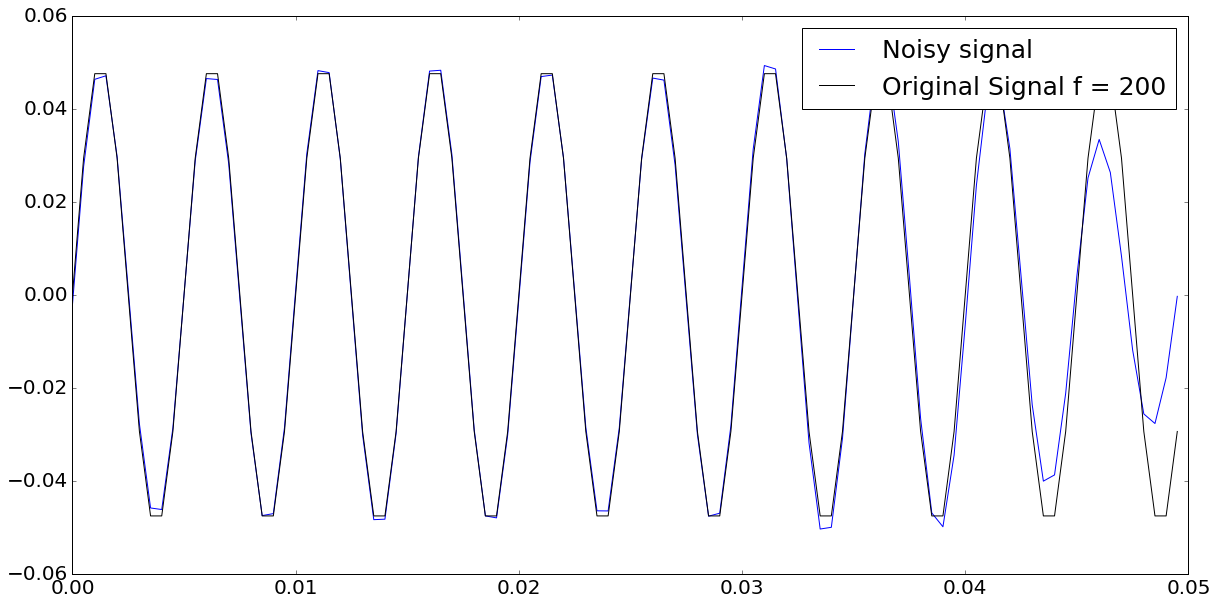

In [7]:
# First, design the Buterworth filter
N  = 5  # Filter order
Nf = fs*0.5 #Nyquist Frequency
lowF = 150# Low Cutoff frequency
HighF = 300# High Cutoff
B, A = signal.butter(N, [lowF/Nf,HighF/Nf], btype='band',output='ba')

# Second, apply the filter
tempf = signal.filtfilt(B,A, x)
plt.figure(2)
plt.clf()
plt.plot(t,tempf, label='Noisy signal')
plt.plot(t,a3*np.sin(2.*np.pi*f3*t),'k',label="Original Signal f = %d"%f3)
plt.legend(loc="best")
plt.show()

# ------------------------------------------------------------------------------------------

# with Noise 

## Noise & how it looks like

(array([ 4980.,  4957.,  4936.,  4971.,  4968.,  5186.,  4959.,  5090.,
         4975.,  4978.]),
 array([ -4.99961355e-01,  -3.99965233e-01,  -2.99969110e-01,
         -1.99972987e-01,  -9.99768645e-02,   1.92582322e-05,
          1.00015381e-01,   2.00011504e-01,   3.00007626e-01,
          4.00003749e-01,   4.99999872e-01]),
 <a list of 10 Patch objects>)

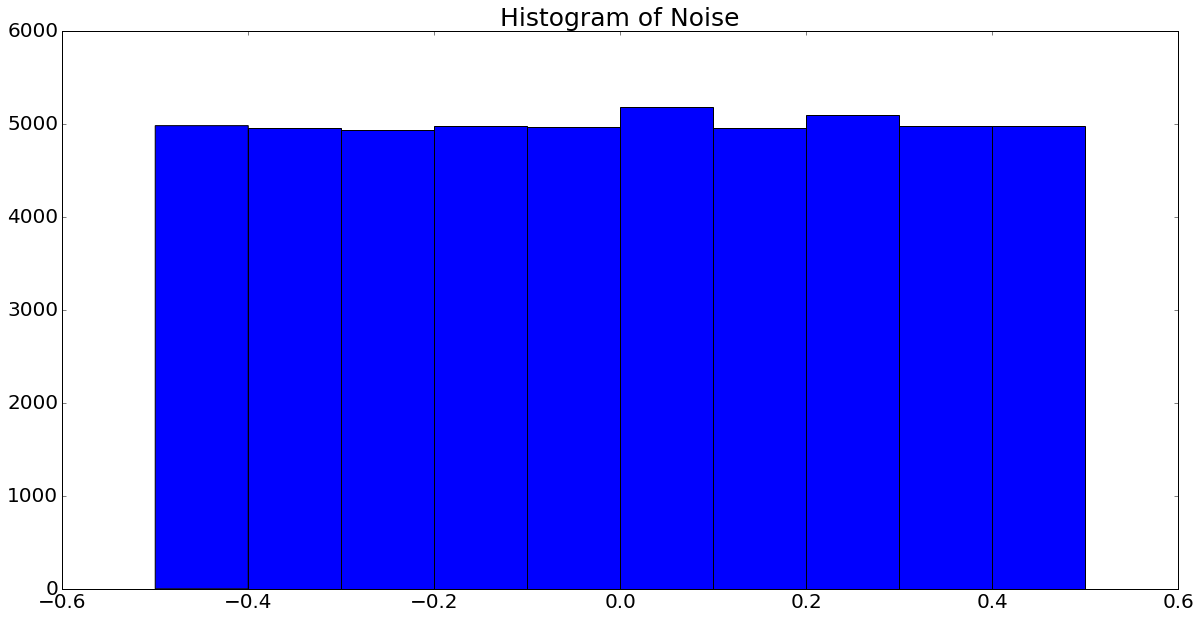

In [58]:
noise = np.array([np.random.rand() - 0.5 for _ in range(50000)])
plt.title("Histogram of Noise")
plt.hist(noise,bins = 10)

# Making a noisy singal

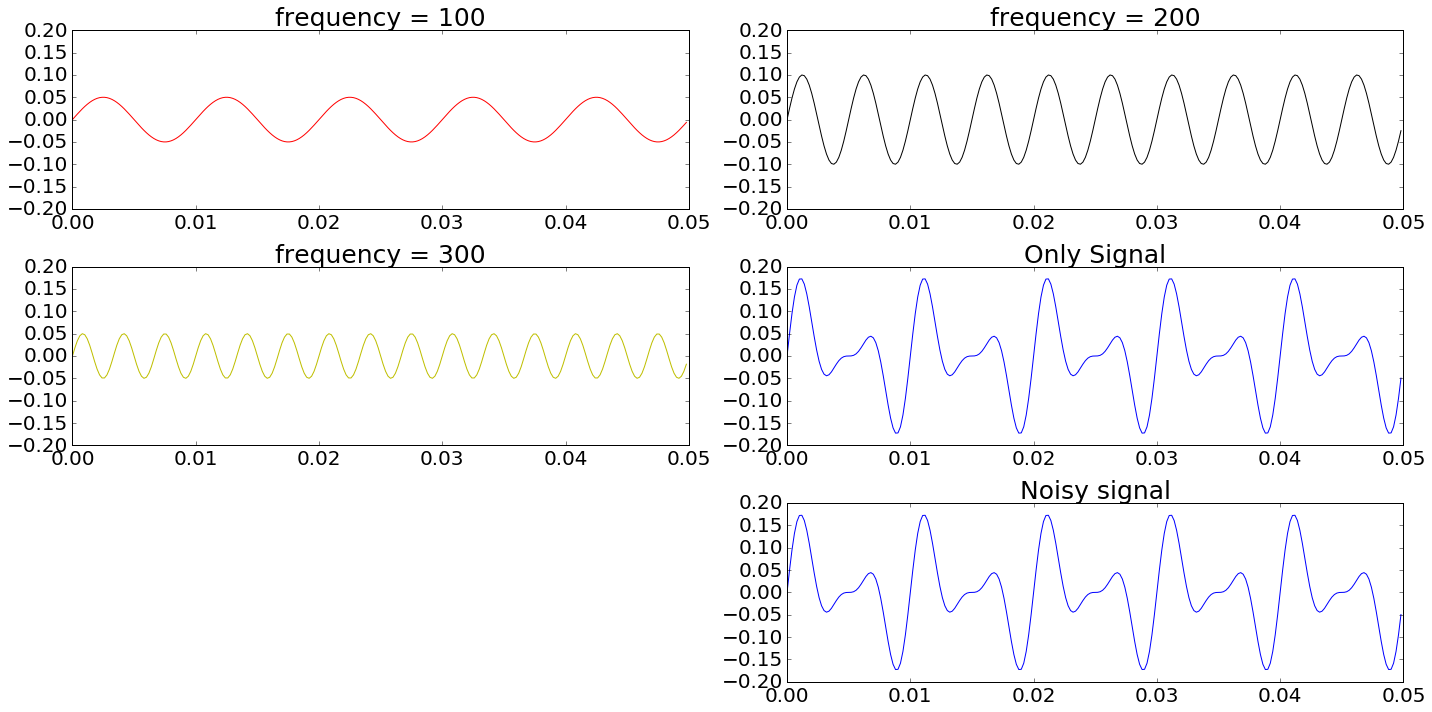

In [69]:
import numpy as np
Tn = 0.05
fsn = 5000
nsamplesn = Tn * fsn
tn = np.linspace(0, Tn, int(nsamplesn), endpoint=False)
#Amplitudes
a1n = 0.05
a2n = 0.1
a3n = 0.05
#Frequencies
f1n = 100
f2n = 200
f3n = 300
#signal : Adding the three signals
xn = a1n*np.sin(2.*np.pi*f1n*tn)
xn += a2n*np.sin(2.*np.pi*f2n*tn)
xn += a3n*np.sin(2.*np.pi*f3n*tn)
without_noise = list(xn[:])
#Now Adding Noise
#xn += an*np.array([np.random.rand() - 0.5 for _ in range(int(nsamplesn))])
#### plotting signal ####
fig = plt.figure(1)
ax = fig.add_subplot(3,2,1)
ax.set_title("frequency = %d"%f1n)
ax.set_ylim(-0.2,0.2)
ax.plot(tn,a1n*np.sin(2.*np.pi*f1n*tn),'r')
####################################
ax = fig.add_subplot(3,2,2)
ax.set_ylim(-0.2,0.2)
ax.set_title("frequency = %d"%f2n)
plt.plot(tn,a2n*np.sin(2.*np.pi*f2n*tn),'k')
####################################
ax = fig.add_subplot(3,2,3)
ax.set_ylim(-0.2,0.2)
ax.set_title("frequency = %d"%f3n)
plt.plot(tn,a3n*np.sin(2.*np.pi*f3n*tn),'y')
####################################
ax = fig.add_subplot(3,2,4)
ax.set_ylim(-0.2,0.2)
ax.set_title("Only Signal")
plt.plot(tn, without_noise)
####################################
ax = fig.add_subplot(3,2,6)
ax.set_ylim(-0.2,0.2)
ax.set_title("Noisy signal")
plt.plot(tn, xn)

plt.tight_layout()
plt.show()

# Plotting Power Spectrum

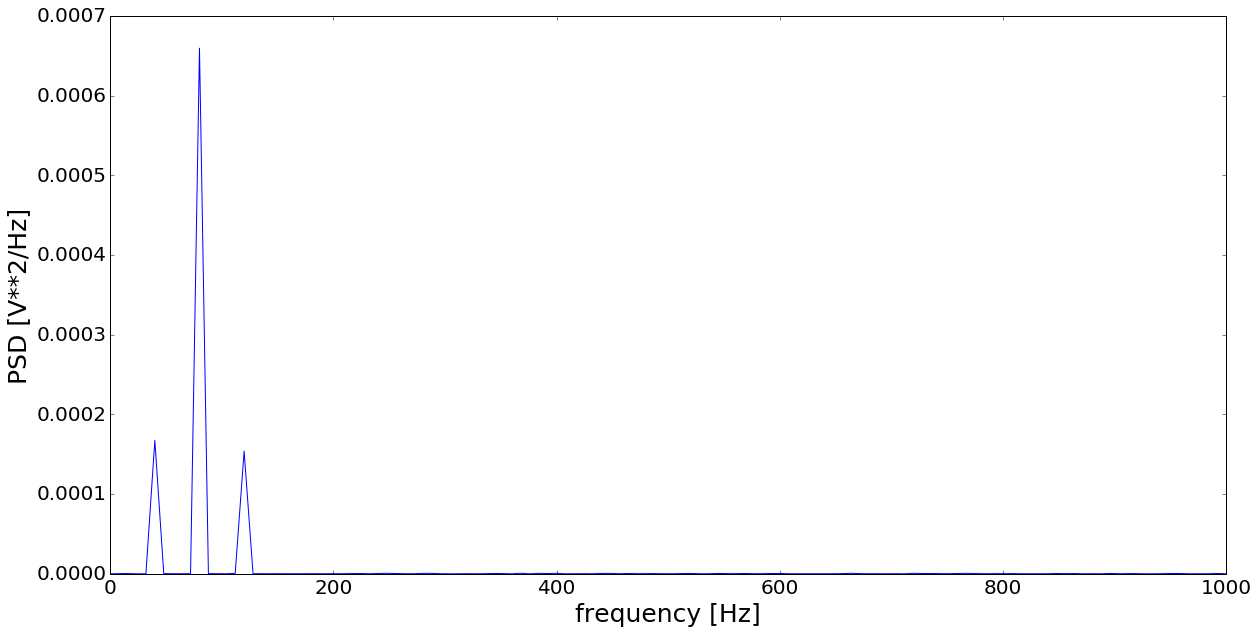

In [63]:
f, Pxx_den = signal.periodogram(xn, fs)
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

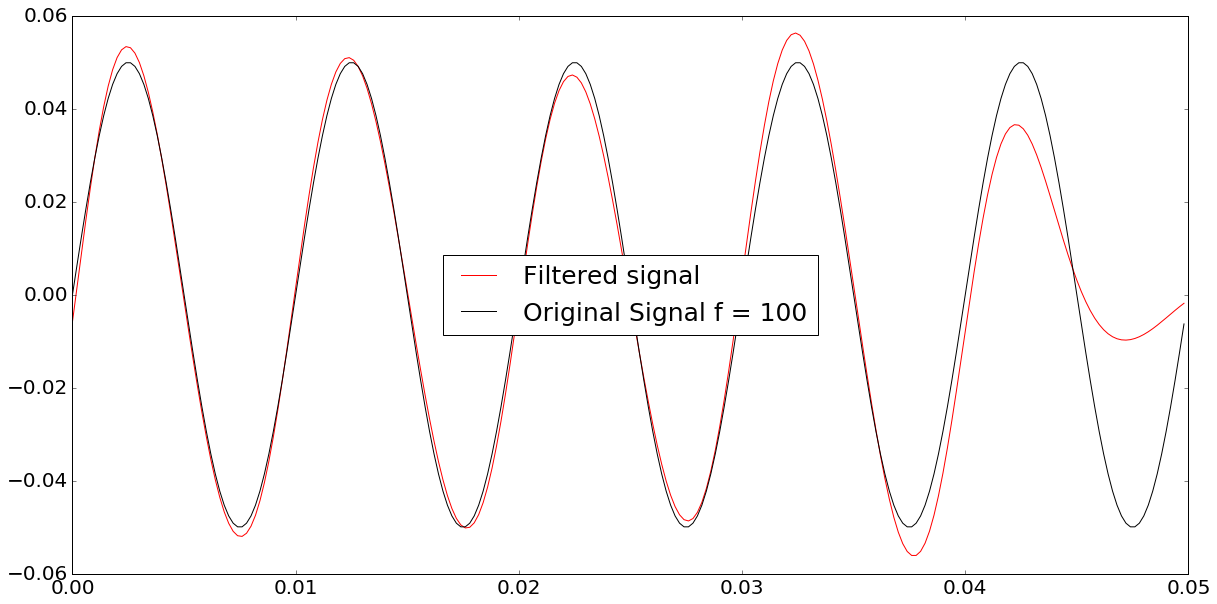

In [81]:
# First, design the Buterworth filter
N  = 4 # Filter order
Nf = fsn*0.5 #Nyquist frequency
lowF = 50# Low Cutoff frequency
HighF = 150# High Cutoff
B, A = signal.butter(N, [lowF/Nf,HighF/Nf], btype='band',output='ba')
#B, A = signal.butter(N, HighF/Nf,output='ba')

# Second, apply the filter
tempf_noise = signal.filtfilt(B,A, xn)
plt.figure(2)
plt.clf()
plt.plot(tn,tempf_noise,'r', label='Filtered signal')
plt.plot(tn,a1n*np.sin(2.*np.pi*f1n*tn),'k',label="Original Signal f = %d"%f1n)
plt.legend(loc="best")
plt.show()